---
# Visualizing a 2-D gaussian probability distribution function (PDF)
---

In this script, we show several examples of surface visualizations of 2-D gaussian PDF.

In its matrix-form, the equation for the 2-D gausian PDF reads like this: 

<blockquote>  $P(\bf{x}) = \frac{1}{2\pi |\Sigma|^{0.5}} \exp{[-\frac{1}{2}(\bf{x}-\bf{\mu})^\top \Sigma^{-1} (\bf{x}-\bf{\mu})]}$  </blockquote>

where 

<blockquote>  $\bf{x}=[x_{1} x_{2}]^\top$ </blockquote> 

<blockquote>  $\mathbb{E}[\bf{x}] = \bf{\mu} = [\mu_{1} \mu_{2}]^\top$  </blockquote> 

<blockquote>  $\Sigma = \begin{pmatrix} \sigma_{x_{1}}^2 & \rho\sigma_{x_{1}}\sigma_{x_{2}} \\ \rho\sigma_{x_{1}}\sigma_{x_{2}} & \sigma_{x_{2}}^2 \end{pmatrix}$ </blockquote>

                  
where $\rho$ is the correlation factor between the $x_{1}$ and $x_{2}$ data. 


In [1]:
print(__doc__)

# Authors: Pierre Gravel <pierre.gravel@iid.ulaval.ca>
# License: XXX

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.stats import multivariate_normal
from matplotlib.ticker import NullFormatter
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()


Automatically created module for IPython interactive environment


Let us first define the printing function to show the results.

In [2]:
def show_PDF(Mu, Sigma, view, figName):

    # Generate a spatial grid where the PDF will be evaluated locally
    x_min, x_max = -4., 4.
    y_min, y_max = -4., 4.
    z_offset = -0.15
    
    N = 60
    X = np.linspace(x_min, x_max, N)
    Y = np.linspace(y_min, y_max, N)
    X, Y = np.meshgrid(X, Y)

    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    # Generator for the 2-D PDF 
    rv = multivariate_normal(Mu, Sigma)
    Z = rv.pdf(pos)     

    z_min = z_offset
    z_max = 1.1 * Z.max()  
    
    
    #----------------
    fig = plt.figure(figsize = (10,10))
    ax = fig.gca(projection='3d')

    # Overlying 3-D surface
    ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)

    # Underlying 2-D filled contours
    cset = ax.contourf(X, Y, Z, zdir='z', offset=z_offset, cmap=cm.viridis)
 
    ax.view_init(view[0], view[1])
    ax.auto_scale_xyz([x_min, x_max], [y_min, y_max], [z_min, z_max])

    ax.set_ylabel('$x_{2}$', fontsize=18)
    ax.xaxis.set_rotate_label(False)  
    ax.set_xlabel('$x_{1}$', rotation=10, fontsize=18)
    ax.zaxis.set_rotate_label(False)  
    ax.set_zlabel('$Z$', rotation=0, fontsize=18)
    ax.yaxis.set_label_coords(-0.1,0.5)
    ax.xaxis.set_label_coords(0.5, -0.05)
    ax.set_title('$Z = PDF(x_{1},x_{2})$', fontsize=18)

    plt.savefig(figName, format='png')

    plt.show()

## Example I: Anisotropic distribution without correlation

The standard deviations $\sigma_{x1}$ and $\sigma_{x2}$ are different with no correlation 
between $x_{1}$ and $x_{2}$.

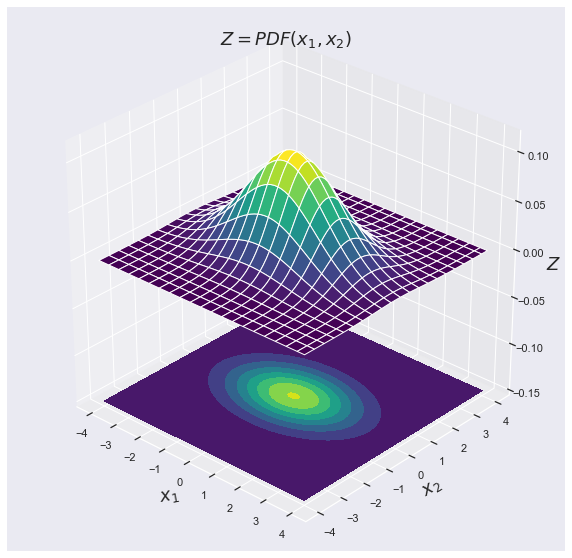

In [3]:
# Parameters
Mu = [0., 0.]

sigma_x1 = 1.5
sigma_x2 = 1.0
rho = 0.
Sigma = [(sigma_x1**2, rho*sigma_x1*sigma_x2), (rho*sigma_x1*sigma_x2, sigma_x2**2)]
figName = "Surface_visualization_of_2D_gaussian_PDF_without_correlation.png"

view = [30., -48.]
show_PDF(Mu, Sigma, view,  figName)

## Example II: Anisotropic distribution with correlation

The standard deviations $\sigma_{x1}$ and $\sigma_{x2}$ are different with a 90% correlation 
between $x_{1}$ and $x_{2}$.

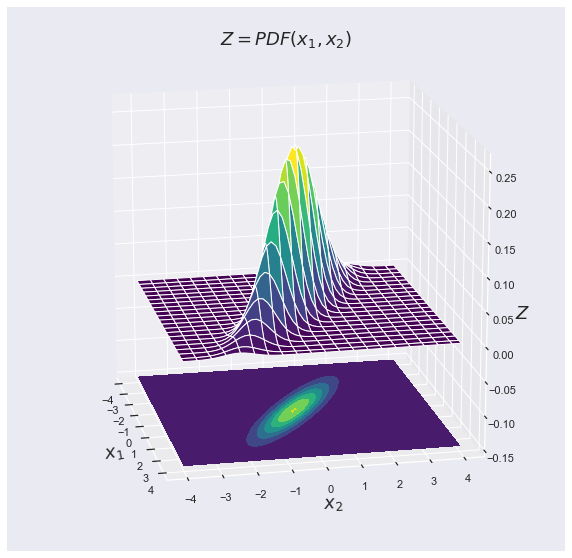

In [4]:
# Parameters
Mu = [0., 0.]

sigma_x1 = 1.5
sigma_x2 = 1.0
rho = -0.9
Sigma = [(sigma_x1**2, rho*sigma_x1*sigma_x2), (rho*sigma_x1*sigma_x2, sigma_x2**2)]

figName = "Surface_visualization_of_2D_gaussian_PDF_with_correlation.png"

view = [17., -12.]
show_PDF(Mu, Sigma, view,  figName)